<a href="https://colab.research.google.com/github/moamenkhalaf97/code/blob/main/working%20on%20Cifar%2010%20with%20CNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import tensorflow as tf
from tensorflow.keras import datasets, layers, models
import matplotlib.pyplot as plt
import numpy as np

In [2]:
(X_train, y_train), (X_test, y_test) = datasets.cifar10.load_data()
X_train.shape

170498071/170498071 [==============================] - 4s 0us/step


(50000, 32, 32, 3)

In [3]:
y_train=y_train.reshape(-1,)
y_train[:5]

array([6, 9, 9, 4, 1], dtype=uint8)

In [4]:
classes=["airplane","automobile","bird","cat","deer","dog","frog","horse","ship","truck"]

In [5]:
def plot_sample(X,y,index):
    plt.figure(figsize=(15,2))
    plt.imshow(X[index])
    plt.xlabel(classes[y[index]])

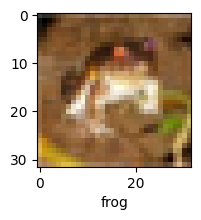

In [6]:
plot_sample(X_train,y_train,0)

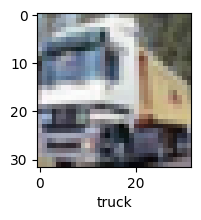

In [7]:
plot_sample(X_train,y_train,1)

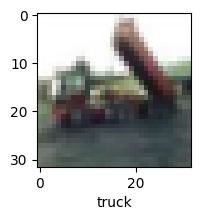

In [8]:
plot_sample(X_train,y_train,2)

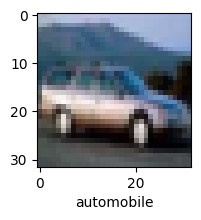

In [9]:
plot_sample(X_train,y_train,4)

In [10]:
X_train=X_train/255.0
X_test=X_test/255.0

In [11]:
ann=models.Sequential([
    layers.Flatten(input_shape=(32,32,3)),
    layers.Dense(3000,activation='relu'),
    layers.Dense(1000,activation='relu'),
    layers.Dense(10,activation='sigmoid')     #10 is the number of classes used
])
ann.compile(optimizer='SGD',
           loss='sparse_categorical_crossentropy',
           metrics=['accuracy'])
ann.fit(X_train,y_train,epochs=5)

Epoch 1/5
1563/1563 [==============================] - 11s 6ms/step - loss: 1.8124 - accuracy: 0.3562
Epoch 2/5
1563/1563 [==============================] - 9s 5ms/step - loss: 1.6228 - accuracy: 0.4270
Epoch 3/5
1563/1563 [==============================] - 10s 6ms/step - loss: 1.5406 - accuracy: 0.4574
Epoch 4/5
1563/1563 [==============================] - 15s 10ms/step - loss: 1.4807 - accuracy: 0.4783
Epoch 5/5
1563/1563 [==============================] - 9s 6ms/step - loss: 1.4313 - accuracy: 0.4957


In [12]:
ann.evaluate(X_test,y_test)

313/313 [==============================] - 1s 3ms/step - loss: 1.5500 - accuracy: 0.4538


[1.5500311851501465, 0.4537999927997589]

In [14]:
 from sklearn.metrics import confusion_matrix,classification_report
 import numpy as np
 y_pred=ann.predict(X_test)
 y_pred_classes=[np.argmax(element) for element in y_pred]
 print("Classification Report: \n",classification_report(y_test,y_pred_classes))

313/313 [==============================] - 1s 2ms/step
Classification Report: 
               precision    recall  f1-score   support

           0       0.71      0.31      0.43      1000
           1       0.72      0.44      0.55      1000
           2       0.34      0.38      0.36      1000
           3       0.33      0.29      0.31      1000
           4       0.40      0.42      0.41      1000
           5       0.34      0.42      0.38      1000
           6       0.38      0.75      0.51      1000
           7       0.71      0.36      0.48      1000
           8       0.48      0.73      0.58      1000
           9       0.66      0.42      0.52      1000

    accuracy                           0.45     10000
   macro avg       0.51      0.45      0.45     10000
weighted avg       0.51      0.45      0.45     10000



In [15]:
cnn=models.Sequential([
    layers.Conv2D(filters=32,kernel_size=(3,3),activation='relu',input_shape=(32,32,3)),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(filters=64,kernel_size=(3,3),activation='relu'),
    layers.MaxPooling2D((2,2)),
    layers.Flatten(),
    layers.Dense(64,activation='relu'),
    layers.Dense(10,activation='softmax'),
    #layers.Dense(10,activation='sigmoid')     #10 is the number of classes used
])

In [16]:
cnn.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy']
              )

In [17]:
cnn.fit(X_train, y_train, epochs=10)

Epoch 1/10
1563/1563 [==============================] - 13s 5ms/step - loss: 1.4781 - accuracy: 0.4684
Epoch 2/10
1563/1563 [==============================] - 7s 5ms/step - loss: 1.1304 - accuracy: 0.6064
Epoch 3/10
1563/1563 [==============================] - 6s 4ms/step - loss: 1.0012 - accuracy: 0.6527
Epoch 4/10
1563/1563 [==============================] - 7s 5ms/step - loss: 0.9179 - accuracy: 0.6811
Epoch 5/10
1563/1563 [==============================] - 6s 4ms/step - loss: 0.8595 - accuracy: 0.7002
Epoch 6/10
1563/1563 [==============================] - 7s 5ms/step - loss: 0.8046 - accuracy: 0.7211
Epoch 7/10
1563/1563 [==============================] - 6s 4ms/step - loss: 0.7580 - accuracy: 0.7365
Epoch 8/10
1563/1563 [==============================] - 7s 5ms/step - loss: 0.7175 - accuracy: 0.7510
Epoch 9/10
1563/1563 [==============================] - 6s 4ms/step - loss: 0.6853 - accuracy: 0.7598
Epoch 10/10
1563/1563 [==============================] - 7s 5ms/step - loss: 0.64

In [19]:
cnn.evaluate(X_test,y_test)

313/313 [==============================] - 1s 4ms/step - loss: 0.9215 - accuracy: 0.6920


[0.9214844703674316, 0.6919999718666077]

In [21]:
y_test=y_test.reshape(-1,)


In [23]:
y_pred=cnn.predict(X_test)

313/313 [==============================] - 2s 4ms/step


In [25]:
y_pred[:5]

array([[8.5579716e-03, 6.7645207e-04, 7.3732096e-03, 6.4371240e-01,
        7.8639865e-04, 2.3049229e-01, 1.7378353e-02, 2.3587259e-04,
        8.0411308e-02, 1.0375786e-02],
       [3.8342625e-02, 5.8340561e-02, 4.3514334e-05, 1.1702474e-06,
        1.6723683e-07, 5.5698415e-09, 5.7546384e-07, 2.7549114e-09,
        8.9799273e-01, 5.2787345e-03],
       [7.2225779e-02, 1.0695994e-02, 5.3460361e-03, 1.3180472e-03,
        3.5521542e-04, 1.8501448e-04, 1.6929896e-04, 4.6119039e-04,
        8.9576364e-01, 1.3479797e-02],
       [5.1500803e-01, 1.3350470e-01, 3.8284224e-03, 1.5273551e-03,
        2.0019901e-04, 8.0189029e-06, 1.0076460e-03, 1.0749028e-05,
        3.4249678e-01, 2.4081087e-03],
       [6.5959107e-06, 5.3013406e-05, 3.4575894e-02, 2.4958992e-02,
        7.2219551e-01, 3.4604557e-03, 2.1460831e-01, 2.2595139e-05,
        1.1820933e-04, 3.8494281e-07]], dtype=float32)

In [28]:
y_classes=[np.argmax(element) for element in y_pred]
y_classes[:5]

[3, 8, 8, 0, 4]

In [29]:
y_test[:5]

array([3, 8, 8, 0, 6], dtype=uint8)

In [30]:
classes[y_classes[1]]

'ship'